In [ ]:
# we will create UPSC essay feedback system using langchain which will use parallel workflow.
# System will provide feedback on the basis of clarity of thought, depth of analysis and language.
# finally we will have final feedback


In [17]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict, Annotated
from dotenv import load_dotenv
from pydantic import BaseModel, Field
import operator

In [5]:
load_dotenv()

True

In [6]:
model = ChatGroq(
    model = "llama-3.3-70b-versatile",
    temperature=0
)


In [26]:
moda = ChatGroq(
    model = "llama-3.3-70b-versatile",
    temperature=0
)


In [7]:
class EvaluationSchema(BaseModel):
    feedback: str = Field(description="Detailed feedback on the essay. Treat yourself as an UPSC examiner.")
    score: int = Field(description="score out of 10 based on given essay.", ge=0, le=10)
    

In [10]:
model = model.with_structured_output(EvaluationSchema)

In [32]:
essay2 = """ I know nothing sir"""

In [ ]:
essay = """Geopolitical Challenges of India

India’s geopolitical environment is shaped by its unique civilizational legacy, strategic location, demographic weight, and rising global aspirations. As the world transitions from a unipolar to a multipolar order, India finds itself at the crossroads of opportunity and challenge. The country’s geopolitical challenges are not limited to traditional security concerns but extend to economic diplomacy, regional stability, technological competition, and global governance. Managing these complexities while safeguarding national interest is one of India’s foremost strategic tasks in the 21st century.

India’s Strategic Geography: A Double-Edged Sword

India’s geography has historically influenced its geopolitical realities. Located at the heart of the Indo-Pacific, India enjoys proximity to major sea lanes of communication (SLOCs) that carry a large portion of global trade and energy flows. This gives India immense strategic leverage, particularly in the Indian Ocean Region (IOR). However, the same geography exposes India to multiple vulnerabilities.

India shares long and often disputed borders with Pakistan and China, two nuclear-armed neighbors with whom relations remain strained. The Himalayan frontier with China is largely unsettled, leading to periodic military standoffs such as Doklam (2017) and Eastern Ladakh (2020). These disputes compel India to maintain high military preparedness, diverting resources from developmental priorities.

China: The Principal Geopolitical Challenge

China represents India’s most significant geopolitical challenge. The asymmetry in economic and military capabilities, coupled with unresolved border disputes, creates a persistent strategic dilemma. China’s assertive behavior, reflected in its infrastructure buildup along the Line of Actual Control (LAC) and its expansive claims, has undermined bilateral trust.

Beyond the land border, China’s growing presence in the Indian Ocean through the Belt and Road Initiative (BRI) and the so-called “String of Pearls” strategy—ports and infrastructure projects in Sri Lanka, Pakistan, Myanmar, and the Maldives—raises concerns about strategic encirclement. The China-Pakistan Economic Corridor (CPEC), passing through Pakistan-occupied Kashmir, directly challenges India’s sovereignty.

India’s response has involved a mix of military preparedness, economic decoupling in sensitive sectors, and strategic partnerships such as the Quad (India, USA, Japan, Australia). However, balancing competition with selective cooperation remains a delicate task.

Pakistan and the Challenge of Regional Instability

Pakistan continues to pose a complex geopolitical challenge rooted in historical animosity, territorial disputes, and cross-border terrorism. Despite India’s conventional military superiority, Pakistan’s reliance on asymmetric warfare and non-state actors has kept the region unstable.

The issue of Jammu and Kashmir, although constitutionally integrated into India, continues to be internationalized by Pakistan. Nuclearization of South Asia further complicates crisis management, as even limited conflicts carry the risk of escalation. India’s challenge lies in maintaining deterrence while avoiding actions that could destabilize regional peace.

South Asia: Leadership versus Perception

As the largest country in South Asia, India is expected to play a leadership role in the region. However, this expectation often clashes with perceptions of Indian dominance among its neighbors. Political instability in Nepal, economic crises in Sri Lanka, military coups in Myanmar, and regime changes in Maldives and Bangladesh affect India’s regional security.

China’s increasing footprint in South Asia has further reduced India’s traditional influence. India’s challenge is to balance strategic interests with sensitivity toward the sovereignty and aspirations of smaller neighbors. Initiatives such as “Neighbourhood First” and “Security and Growth for All in the Region (SAGAR)” reflect India’s attempt to redefine regional engagement through cooperation rather than coercion.

The Indo-Pacific and Great Power Politics

The Indo-Pacific has emerged as the central theater of global geopolitics. India’s involvement in this region marks a shift from its earlier continental focus to a maritime outlook. While partnerships with the United States and its allies offer strategic advantages, they also bring dilemmas of alignment.

India has historically valued strategic autonomy and avoided formal alliances. In a polarized world, maintaining this autonomy while engaging with rival power blocs is increasingly difficult. Relations with Russia illustrate this challenge. While Russia remains a key defense partner, its growing closeness with China and tensions with the West complicate India’s foreign policy calculus.

Economic and Technological Dimensions of Geopolitics

Geopolitics today is inseparable from economics and technology. India faces challenges in securing supply chains, attracting investment, and reducing dependence on strategic imports, particularly from China. Trade deficits, energy security, and access to critical minerals are now geopolitical issues.

Technological competition in areas such as semiconductors, artificial intelligence, cyber security, and space has become a new frontier. India must bridge internal capacity gaps while preventing technological vulnerabilities that could compromise national security.

Global Governance and India’s Aspirations

India’s aspiration to play a greater role in global governance presents both opportunity and challenge. Its demand for permanent membership in the UN Security Council reflects its growing stature but also exposes resistance from entrenched powers. Similarly, India seeks greater voice in institutions such as the IMF, World Bank, and WTO, where global rules often favor developed economies.

Climate change diplomacy is another area of geopolitical complexity. India must balance developmental needs with global environmental commitments, often navigating pressure from advanced economies while advocating climate justice for the Global South.

Conclusion

India’s geopolitical challenges are multifaceted, dynamic, and deeply interconnected. They arise from its geography, neighborhood, great power rivalries, and internal developmental constraints. Yet, these challenges also underline India’s rising importance in global affairs.

The way forward lies in a combination of strategic realism and moral leadership—strengthening military and economic capabilities while promoting dialogue, multilateralism, and regional cooperation. By leveraging its demographic dividend, democratic credentials, and civilizational soft power, India can transform geopolitical challenges into strategic opportunities and emerge as a stabilizing force in an increasingly uncertain world."""

In [11]:
topic = "Geopolitical Challenges of India"

In [14]:
prompt = f"Evaluate the essay of the UPSC aspirant and provide him constructive feedback. \n {topic} \n Essay: {essay}"

In [15]:
model.invoke(prompt)

EvaluationSchema(feedback="The essay provides a comprehensive overview of India's geopolitical challenges, covering its strategic geography, relations with neighboring countries, great power politics, economic and technological dimensions, and global governance. The writer demonstrates a good understanding of the complexities involved and presents a balanced analysis of the opportunities and challenges. However, there are areas that require improvement. Firstly, the essay could benefit from a clearer structure, with more defined sections and transitions between them. Secondly, some of the paragraphs are overly long and could be broken up for better readability. Additionally, the writer could provide more specific examples and data to support their arguments, particularly in the sections on economic and technological dimensions. Furthermore, the conclusion could be more concise and effective in summarizing the main points. Overall, the essay demonstrates a good grasp of the subject matt

In [19]:
class UPSCState(TypedDict):
    topic: str
    essay: str
    language_feedback: str
    analysis_feedback: str
    clarity_feedback: str
    overall_feedback: str

    individual_scores: Annotated[list[int], operator.add]
    avg_score: float

In [ ]:
def evaluate_language(state: UPSCState):
    prompt = f"evaluate the language quality of the essay written by the UPSC aspirant and provide  him constructive feedback with score out of 10. you are an  ecpert UPSC examinor. \n  topic : {state['topic']} \n esssay: {state['essay']}"
    output = model.invoke(prompt)
    return {'language_feedback': output.feedback, 'individual_scores': [output.score]}  # dont return state in parallel workflow, it will through an error.

In [22]:
def evaluate_analysis(state: UPSCState):
    prompt = f"evaluate the depth of analysis of the essay written by the UPSC aspirant and provide  him constructive feedback with score out of 10. you are an  ecpert UPSC examinor. \n  topic : {state['topic']} \n esssay: {state['essay']}"
    output = model.invoke(prompt)
    return {'analysis_feedback': output.feedback, 'individual_scores': [output.score]}

In [25]:
def evaluate_thought(state: UPSCState):
    prompt = f"evaluate the thought process of the essay written by the UPSC aspirant and provide  him constructive feedback with score out of 10. you are an  ecpert UPSC examinor. \n  topic : {state['topic']} \n esssay: {state['essay']}"
    output = model.invoke(prompt)
    return {'clarity_feedback': output.feedback, 'individual_scores': [output.score]}

In [27]:
def final_evaluation(state: UPSCState):
    prompt = f"Based on the given essay and feedbacks provide overall feedback to the UPSC aspirant. you are an expert UPSC examinor. \n topic: {state['topic']} \n essay: {state['essay']} \n language feedback: {state['language_feedback']} \n analysis feedback: {state['analysis_feedback']} \n clarity feedback: {state['clarity_feedback']}"
    overall_feedback = moda.invoke(prompt)
    avg_score = sum(state['individual_scores'])/len(state['individual_scores'])

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}

In [28]:
graph = StateGraph(UPSCState)

graph.add_node('evaluate_analysis', evaluate_analysis)
graph.add_node('evaluate_language', evaluate_language)
graph.add_node('evaluate_thought', evaluate_thought)
graph.add_node('final_evaluation', final_evaluation)

### add edges
graph.add_edge(START, 'evaluate_language')
graph.add_edge(START, 'evaluate_analysis')
graph.add_edge(START, 'evaluate_thought')
graph.add_edge('evaluate_language', 'final_evaluation')
graph.add_edge('evaluate_analysis', 'final_evaluation')
graph.add_edge('evaluate_thought', 'final_evaluation')
graph.add_edge('final_evaluation', END)

In [29]:
workflow = graph.compile()

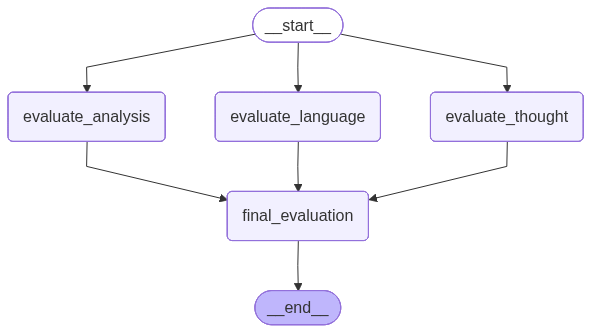

In [30]:
workflow

In [33]:
initial_state = {
    'topic' : topic,
    'essay' : essay2
}

workflow.invoke(initial_state)

{'topic': 'Geopolitical Challenges of India',
 'essay': ' I know nothing sir',
 'language_feedback': "The essay lacks depth and substance, failing to address the topic of Geopolitical Challenges of India. The response 'I know nothing sir' is not a coherent or meaningful attempt to engage with the subject matter. As a UPSC aspirant, it is expected that you demonstrate a basic understanding of the topic and provide relevant arguments, examples, and analysis. To improve, focus on developing a clear and concise writing style, and ensure that you provide specific examples and evidence to support your arguments. Additionally, practice writing essays on a variety of topics to improve your knowledge and critical thinking skills.",
 'analysis_feedback': "The essay lacks depth and analysis of the geopolitical challenges faced by India. As a UPSC aspirant, it is expected that the candidate has a good understanding of the subject matter and can provide a well-structured and well-reasoned essay. Th